**Name:** Luong Nguyen  
**Student ID:** 1504210
<h3>Cognitive Systems Mathematics and Methods  
Assignment 3: Phishing websites</h3>
<hr>

### Data preparation

#### Import data

In [2]:
import pandas as pd 

# Load Data From CSV File
df = pd.read_csv('phishing.csv', sep=';')
df.index += 1 

print(df.head().transpose())

                             1  2  3  4  5
having_IP_Address           -1  1  1  1  1
URL_Length                   1  1  0  0  0
Shortining_Service           1  1  1  1 -1
having_At_Symbol             1  1  1  1  1
double_slash_redirecting    -1  1  1  1  1
Prefix_Suffix               -1 -1 -1 -1 -1
having_Sub_Domain           -1  0 -1 -1  1
SSLfinal_State              -1  1 -1 -1  1
Domain_registeration_length -1 -1 -1  1 -1
Favicon                      1  1  1  1  1
port                         1  1  1  1  1
HTTPS_token                 -1 -1 -1 -1  1
Request_URL                  1  1  1 -1  1
URL_of_Anchor               -1  0  0  0  0
Links_in_tags                1 -1 -1  0  0
SFH                         -1 -1 -1 -1 -1
Submitting_to_email         -1  1 -1  1  1
Abnormal_URL                -1  1 -1  1  1
Redirect                     0  0  0  0  0
on_mouseover                 1  1  1  1 -1
RightClick                   1  1  1  1  1
popUpWindow                  1  1  1  1 -1
Iframe     

#### Preprocess data

In [8]:
X, y = df.drop(columns=['Result']), df['Result']
print('X: feature matrix')
print(X.head().transpose())
print('\ny: target vector')
print(y.head())

X: feature matrix
                             1  2  3  4  5
having_IP_Address           -1  1  1  1  1
URL_Length                   1  1  0  0  0
Shortining_Service           1  1  1  1 -1
having_At_Symbol             1  1  1  1  1
double_slash_redirecting    -1  1  1  1  1
Prefix_Suffix               -1 -1 -1 -1 -1
having_Sub_Domain           -1  0 -1 -1  1
SSLfinal_State              -1  1 -1 -1  1
Domain_registeration_length -1 -1 -1  1 -1
Favicon                      1  1  1  1  1
port                         1  1  1  1  1
HTTPS_token                 -1 -1 -1 -1  1
Request_URL                  1  1  1 -1  1
URL_of_Anchor               -1  0  0  0  0
Links_in_tags                1 -1 -1  0  0
SFH                         -1 -1 -1 -1 -1
Submitting_to_email         -1  1 -1  1  1
Abnormal_URL                -1  1 -1  1  1
Redirect                     0  0  0  0  0
on_mouseover                 1  1  1  1 -1
RightClick                   1  1  1  1  1
popUpWindow                  1  1  1

#### train/test split 

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # random_state ensures we will always get the same split

print('Shape of')
print('  train data:       ', X_train.shape)
print('  validation data:  ', X_test.shape)
print('  train labels:     ', y_train.shape)
print('  validation labels:', y_test.shape)


Shape of
  train data:        (7738, 30)
  validation data:   (3317, 30)
  train labels:      (7738,)
  validation labels: (3317,)


### Decision tree

#### Modeling

In [14]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(max_depth = 2)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction

In [21]:
predTree = model.predict(X_test)

print('\tSome examples of:')
print('The predictions:')
print (predTree[0:5])
print('Actual labels')
print (y_test[0:5])


	Some examples of:
The predictions:
[ 1 -1  1 -1  1]
Actual labels
5490     1
10106   -1
1292    -1
4177    -1
4294     1
Name: Result, dtype: int64


#### Evaluation

In [19]:
from sklearn import metrics

print(f'DecisionTrees\'s Accuracy: {metrics.accuracy_score(y_test, predTree) * 100:.1f}%')

DecisionTrees's Accuracy: 90.2%


#### Visualization

In [0]:
import numpy as np
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

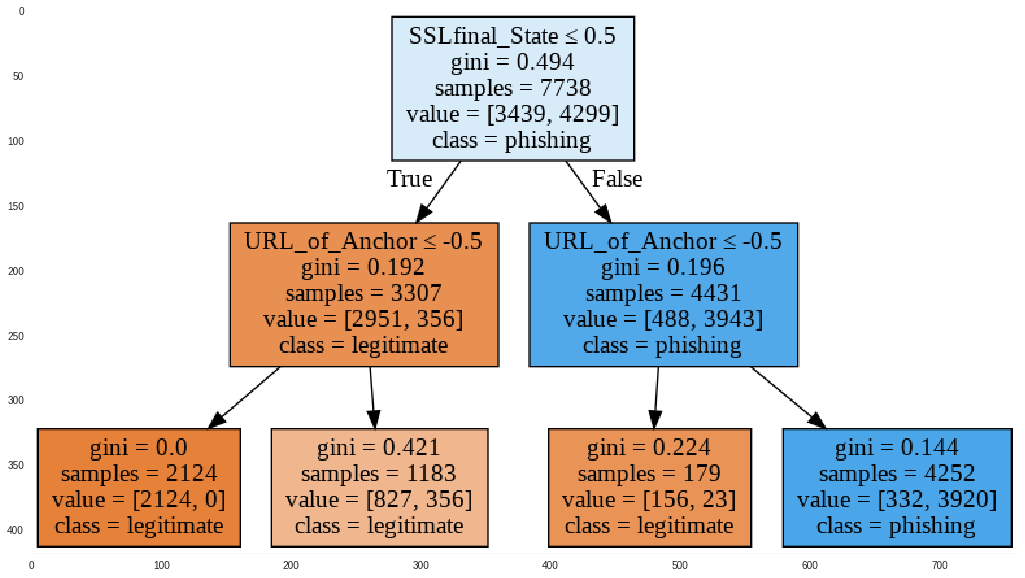

In [38]:
dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df.columns.get_values()[:30]
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['legitimate', 'phishing'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 10))
plt.imshow(img,interpolation='nearest')
plt.grid(False)
plt.show()

### Instructions

Based on the decision tree, to determine if a site is phishing or not, first we need to check if it the site has HTTPS, no matter if the issuer is trustworthy or not. If the site has HTTPS, we can classify it as legitimate.  
With the sites that don't have HTTPS, we need to look at the URL_of_Anchor, which means the percentage of the `<a>` tags that link to different domain names or do not link to any site. If it's less than 31%, the site is legitimate, otherwise it's phishing.   
Using this simple algorithm, we will be correct 90% of the time in detecting phishing sites. If we use a deeper tree, we will even achieve higher accuracy. 

